In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [9]:
data=pd.read_csv("Salary_dataset.csv")

In [10]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [11]:
data.isnull()

,Unnamed: 0,YearsExperience,Salary
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [16]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

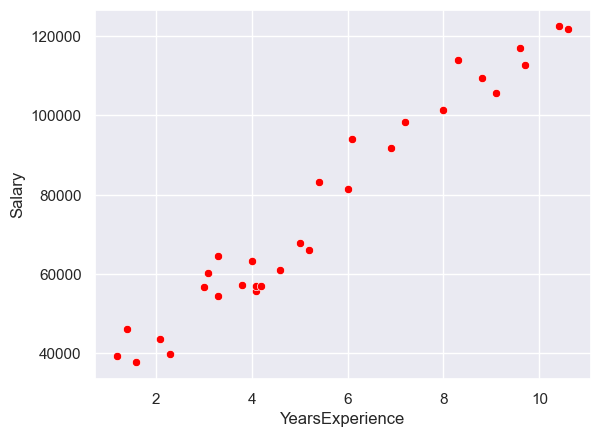

In [21]:
import seaborn as sns
sns.scatterplot(x="YearsExperience",y="Salary", data=data,color='red')
sns.set_theme(style="darkgrid", palette="pastel")


<Axes: xlabel='YearsExperience', ylabel='Salary'>

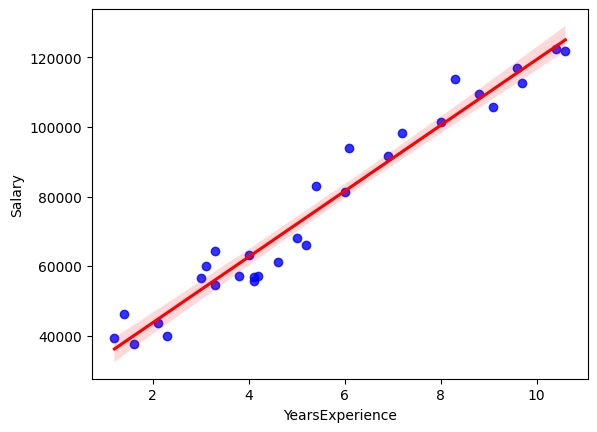

In [18]:
sns.regplot(x="YearsExperience", y="Salary", data=data, scatter=True, color='blue', line_kws={"color": "red"})


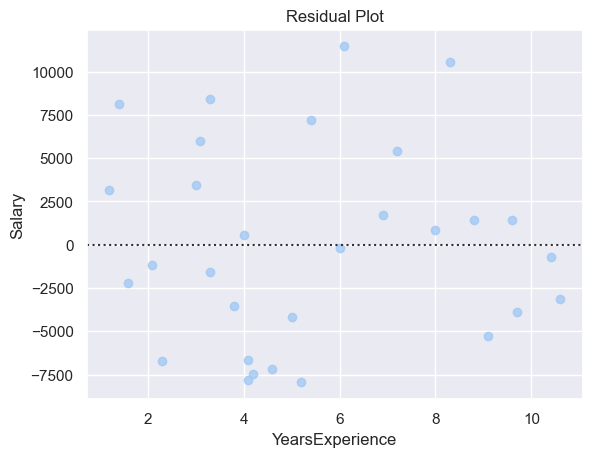

In [22]:
sns.residplot(x="YearsExperience", y="Salary", data=data)
plt.title("Residual Plot")
plt.show()


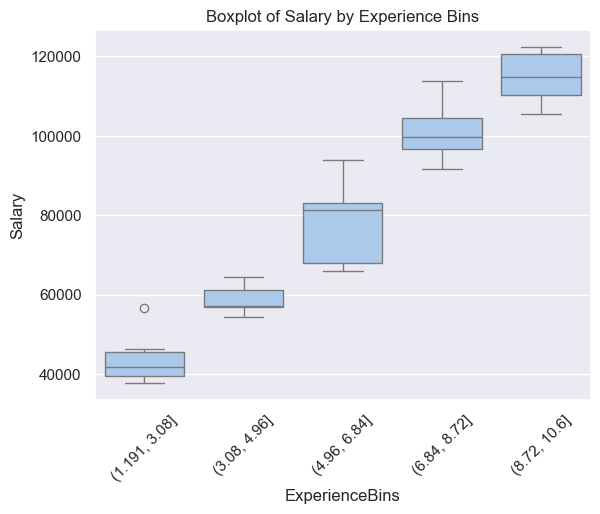

In [25]:

# Create bins
data['ExperienceBins'] = pd.cut(data['YearsExperience'], bins=5)  # You can change number of bins

# Plot
sns.boxplot(x='ExperienceBins', y='Salary', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of Salary by Experience Bins')
plt.show()


In [24]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [26]:
X=data['YearsExperience'] # make sure the independent feature should be a dataframe or a 2D array not a series
type(X)

pandas.core.series.Series

In [27]:
X= data[['YearsExperience']]
type(X)

pandas.core.frame.DataFrame

In [28]:
y= data['Salary'] # this can be in 1D or series
type(y)

pandas.core.series.Series

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state =42)

In [30]:
X_train.shape

(24, 1)

In [31]:
y_train.shape

(24,)

In [32]:
## Standardization 
from sklearn.preprocessing import StandardScaler

In [33]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)

In [34]:
X_test= scaler.transform(X_test)

In [35]:
X_test

array([[ 1.5315002 ],
       [-0.09978613],
       [ 1.04558513],
       [ 0.03904675],
       [-0.68982587],
       [-0.51628477]])

In [38]:
X_train

array([[ 1.77445774],
       [ 1.21912622],
       [-0.41216011],
       [-1.41869849],
       [-1.03690807],
       [-0.03036969],
       [-0.79395053],
       [-0.37745189],
       [-0.41216011],
       [ 0.94146047],
       [-1.34928205],
       [-1.27986561],
       [ 1.32325088],
       [-1.10632451],
       [ 0.66379471],
       [ 1.49679198],
       [ 0.24729607],
       [ 1.84387418],
       [ 0.55967005],
       [-0.68982587],
       [-0.44686833],
       [-0.23861901],
       [ 0.28200429],
       [-0.75924231]])

In [39]:
## Fitting Linear regression model
from sklearn.linear_model import LinearRegression

In [43]:
regression=LinearRegression(n_jobs=-1)

In [44]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [46]:
regression.coef_ ## this is our slope B1

array([27151.53742583])

In [47]:
regression.intercept_ ## this is our intercept B0;

np.float64(74208.625)

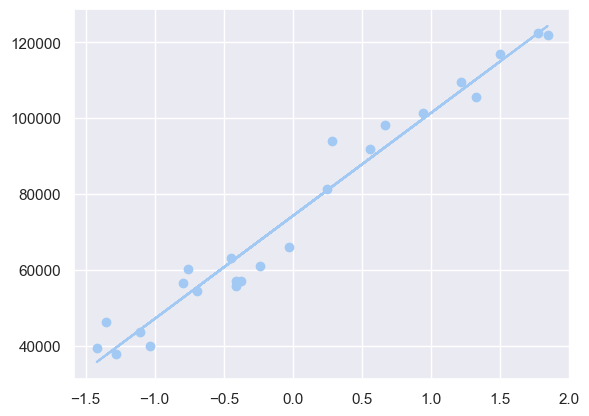

In [54]:
## plot training data plot best fit line 
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train))
                                    

<Axes: ylabel='Salary'>

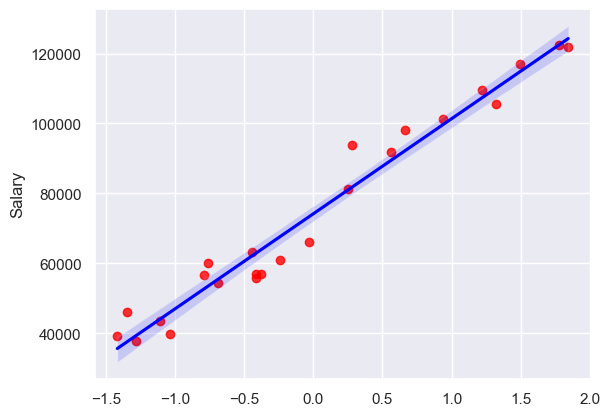

In [51]:
sns.regplot(x=X_train, y=y_train, data=data, color ='red',line_kws={"color":"blue"})

In [55]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [56]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [57]:
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2= r2_score(y_test,y_pred)

In [58]:
mae,mse,rmse,r2

(np.float64(6286.453830757742),
 np.float64(49830096.85590836),
 np.float64(7059.043621901507),
 0.9024461774180498)

In [60]:
# OLS Linear Regression
!pip install statsmodels
import statsmodels.api as sm


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.8 MB 16.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.8 MB 12.4 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 9.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.8 MB 8.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 6.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 6.1 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 4.8 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 4.6 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.3 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.8 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.0 MB/s eta 0:00:00


In [61]:
model = sm.OLS(y_train,X_train).fit()

In [63]:
prediction=model.predict(X_test)
prediction

array([ 41582.58511287,  -2709.34690537,  28389.24366063,   1060.17922384,
       -18729.83295452, -14017.92529301])

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.079
Method:                 Least Squares   F-statistic:                              3.064
Date:                Thu, 15 May 2025   Prob (F-statistic):                      0.0934
Time:                        14:29:41   Log-Likelihood:                         -303.26
No. Observations:                  24   AIC:                                      608.5
Df Residuals:                      23   BIC:                                      609.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.715e+04   1.55e+04      1.750      0.093   -4936.647    5.92e+04
==============================================================================
Omnibus:                        0.647   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.724   Jarque-Bera (JB):                0.697
Skew:                           0.323   Prob(JB):                        0.706
Kurtosis:                       2.472   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
regression.predict([[2.6]])

array([144802.62230717])

In [75]:
regression.predict(scaler.transform([[1.2]]))

C:\Users\HIMANSHURAJ\OneDrive\Desktop\virtual_env test\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([35688.77986711])